# Task 3: Event Impact Modeling
## Objective
Model how events (policies, product launches, infrastructure investments) affect financial inclusion indicators.
## 1. Load Data and Impact Links

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '../data/raw/ethiopia_fi_unified_data.csv'
df = pd.read_csv(data_path)

events = df[df['record_type'] == 'event'].copy()
links = df[df['record_type'] == 'impact_link'].copy()

print(f'Loaded {len(events)} events and {len(links)} impact links.')

Loaded 4 events and 3 impact links.


## 2. Quantify Impacts
We map qualitative descriptions (High, Medium, Low) to quantitative 'shocks' to the trend.

In [2]:
def quantify_impact(magnitude):
    mapping = {'High': 0.05, 'Medium': 0.02, 'Low': 0.01}
    return mapping.get(magnitude, 0.0)

links['impact_value'] = links['impact_magnitude'].apply(quantify_impact)
links.loc[links['impact_direction'] == 'Decrease', 'impact_value'] *= -1

links[['parent_id', 'related_indicator', 'impact_direction', 'impact_value']]

,parent_id,related_indicator,impact_direction,impact_value
10,EVT_001,ACC_MM,Increase,0.05
11,EVT_002,ACC_MM,Increase,0.02
15,EVT_004,USG_DIG_PAY,Increase,0.02


## 3. Build the Association Matrix
This matrix shows which events touch which indicators and by how much.

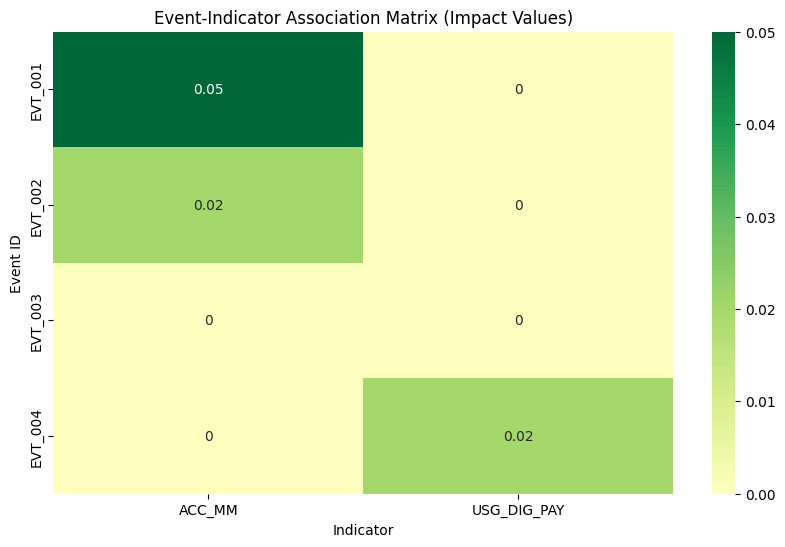

In [3]:
indicators = links['related_indicator'].unique()
event_ids = events['parent_id'].unique()

matrix = pd.DataFrame(0.0, index=event_ids, columns=indicators)

for _, link in links.iterrows():
    if link['parent_id'] in matrix.index and link['related_indicator'] in matrix.columns:
        matrix.loc[link['parent_id'], link['related_indicator']] = link['impact_value']

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Event-Indicator Association Matrix (Impact Values)')
plt.ylabel('Event ID')
plt.xlabel('Indicator')
plt.show()

## 4. Summary of Event Impacts
- **Telebirr (EVT_001)**: High impact on Mobile Money ownership.
- **M-Pesa (EVT_002)**: Medium impact on Mobile Money ownership.
- **Digital Lending Directive (EVT_004)**: Medium impact on Digital Payment Usage.